In [1]:
import os
from statsmodels.tsa.arima_model import ARMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.vector_ar.var_model import VAR

## Load and clean data 

df = pd.read_csv("C:/Users/chris/Downloads/cpi-u-202109 - US.csv")
df_1 = df.iloc[6:-19,0:3]
df_2 = df.iloc[6:-19, 16:29]
df_2 = df_2.apply(pd.to_numeric, errors='ignore')
df = pd.concat([df_1, df_2], axis=1)
df.columns = ["Indent Level", "Expenditure category","Relative importance", "September 2020",
                                                                            "October 2020",
                                                                            "November 2020",
                                                                            "December 2020",
                                                                            "January 2021",
                                                                            "February 2021",
                                                                            "March 2021",
                                                                            "April 2021",
                                                                            "May 2021",
                                                                            "June 2021",
                                                                            "July 2021",
                                                                            "August 2021",
                                                                            "September 2021"]      

df = df[df["Indent Level"] == "1"] # Hardcoded level
df = df[~df["Expenditure category"].str.contains("All items")]
df["Relative importance"] = pd.to_numeric(df["Relative importance"])  
df["Relative importance"] = df["Relative importance"]/sum(df["Relative importance"])

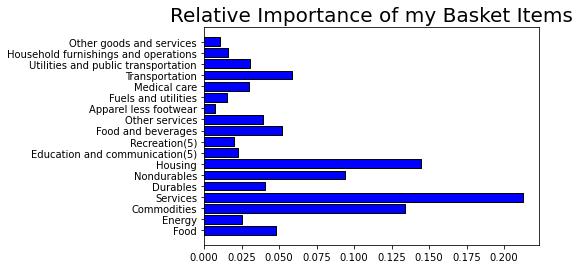

In [2]:
## Visualize relative importance of basket items  

plt.barh(df["Expenditure category"],df["Relative importance"],color='blue',edgecolor='black')
plt.title('Relative Importance of my Basket Items',fontsize=20)
plt.show()

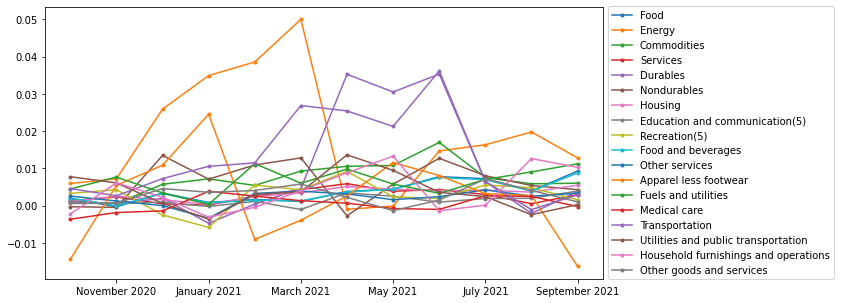

In [3]:
## Veryifying it was 0.4 last month
## Technical debt: fix these shitty naming conventions 

dd = df.T
dd.columns = dd.iloc[1,:]
dd = dd.iloc[3:,:]
for col in dd.columns:
    dd[col] = dd[col].pct_change()
plt.rcParams['figure.figsize'] = [10, 5]
dd.plot( style='.-').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dd = dd.iloc[1:,:]

In [4]:
## Veryify as a sanity check that last month (August) was indeed 0.005% 

final = 0
for i in range(0, len(df)):
    final = final + df.iloc[i,2]/sum(df["Relative importance"])*dd.iloc[-1,i]
final = round(final, 3)
print(final)
if final != 0.005:
    print("ERROR")
else:
    print("Data looks good!")

0.005
Data looks good!


In [8]:
## 1: Fit an AR(1) model to the first simulated data
## I can't stress enough how shitty/lazy these naming conventions and for-loops are 

empty = pd.DataFrame([])
for col in  dd.columns:
    mod = ARMA(dd[col], order=(1, 0))
    res = mod.fit()
    yhat = pd.DataFrame(res.predict(len(dd), len(dd)))
    empty = pd.concat([empty, yhat])
ddd = 0
for i in range(0, len(empty)):
    d = empty.iloc[i,0] * df.iloc[i,2]
    ddd = ddd + d
    print(ddd)

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

0.00033300416238061544
0.0007427645881556847
0.0015853138028747269
0.002168347106254684
0.002403445385520228
0.003012865129011938
0.0037062055755310063
0.0037415367348121475
0.0037938202465240727
0.0041407342803891556
0.004235342157634147
0.004243166677364393
0.0043394979866747015
0.0043378133124208264
0.0047736206537750455
0.004841429378786525
0.004926604424238794
0.0049528191879961115


In [7]:
empty["names"] = df["Expenditure category"]

In [9]:
# 2: Moving Average 

empty = pd.DataFrame([])
for col in  dd.columns:
    mod = ARMA(dd[col], order=(0, 0, 1))
    res = mod.fit()
    yhat = pd.DataFrame(res.predict(len(dd), len(dd)))
    empty = pd.concat([empty, yhat])
ddd = 0
for i in range(0, len(empty)):
    d = empty.iloc[i,0] * df.iloc[i,2]
    ddd = ddd + d
    print(ddd)

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

0.00018036557068322473
0.0006538837911784282
0.0016244259141871692
0.0021819414639165312
0.002562420274356938
0.003161742026997998
0.0036213876872420807
0.003653804405832252
0.003710039518672159
0.0038984702168714884
0.003979890606687168
0.00399472207919582
0.00409686956619315
0.004107749385615611
0.0048611113024507255
0.004974268928712713
0.005041287738358079
0.005071389393490122


C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [104]:
# 3: ARMA  

empty = pd.DataFrame([])
for col in  dd.columns:
    mod = ARMA(dd[col], order=(2, 0, 1))
    res = mod.fit()
    yhat = pd.DataFrame(res.predict(len(dd), len(dd)))
    empty = pd.concat([empty, yhat])
ddd = 0
for i in range(0, len(empty)):
    d = empty.iloc[i,0] * df.iloc[i,2]
    ddd = ddd + d
    print(ddd)

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

0.00026263677043717766
0.0006630683053395403
0.001510449404943407
0.0022066325273041353
0.002544836982343715
0.0033241912736414617
0.004023062908529289
0.004061329825370827
0.00410284897912565
0.0043834311192420365
0.004476589372025859
0.0044887808043401044
0.004577356591747086
0.0045509156141593345
0.005063871864339894
0.005192965825757442
0.005201700881421525
0.005219671527855345


In [10]:
## 4: # VAR example

model = VAR(dd)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
yhat = pd.DataFrame(yhat)
dddd = 0
for i in yhat:    
    d = yhat.iloc[0,i] * df.iloc[i,2]
    dddd = dddd+ d
    print(dddd)

0.00044153270970669073
0.0004951864061502972
0.0013324870576245337
0.0026317591887764437
0.003134610659860881
0.002924976350264217
0.004016972200698356
0.004087065036371804
0.004270336673931517
0.0047335301374120215
0.005008186995371225
0.004795447557132654
0.005025243747270116
0.004961078209084685
0.005652295522364525
0.005794344680463131
0.005969181462794195
0.005952700227510876


C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
